# Data Prep

Building off of the data prep notebook from Assignment 4.
* [EDA](#EDA)
* [Column Transformation](#Column-Transformation)
* [Feature selection](#Feature-Selection)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'

In [3]:

teledf = pd.read_csv('data/telcomarketing.csv')

# EDA

In [4]:


teledf.sample(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1520,NM,113,510,No,No,0,150.1,120,25.52,200.1,85,17.01,266.7,105,12.00,11.0,3,2.97,2,False
2507,GA,98,408,No,No,0,169.9,77,28.88,138.3,155,11.76,142.6,105,6.42,8.5,7,2.30,1,False
1091,SD,20,415,No,Yes,35,171.5,98,29.16,153.1,127,13.01,165.6,125,7.45,7.1,3,1.92,0,False
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
52,SD,149,408,No,Yes,28,180.7,92,30.72,187.8,64,15.96,265.5,53,11.95,12.6,3,3.40,3,False


In [5]:
teledf.shape

(3333, 20)

In [6]:
teledf.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [7]:
teledf.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [8]:
teledf.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [9]:
#QC

teledf.sample(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2911,NY,122,415,No,No,0,173.6,110,29.51,91.7,84,7.79,211.7,103,9.53,9.7,7,2.62,3,False
1729,FL,166,510,Yes,No,0,47.7,89,8.11,264.4,95,22.47,235.2,97,10.58,13.2,3,3.56,0,True
592,CO,22,510,No,Yes,23,182.1,94,30.96,164.6,59,13.99,128.8,102,5.80,12.7,4,3.43,3,False
2323,OR,134,415,No,Yes,50,208.8,130,35.50,132.9,104,11.30,136.7,107,6.15,11.1,4,3.00,2,False
1916,OR,51,510,No,No,0,51.8,107,8.81,230.2,104,19.57,227.5,118,10.24,10.4,4,2.81,2,False


In [10]:
cat_var = ['State','Area code']
bin_var = ['International plan', 'Voice mail plan']
target_var = ['Churn']
non_cont = cat_var + bin_var + target_var

cont_var = list(teledf.drop(columns = non_cont).columns)

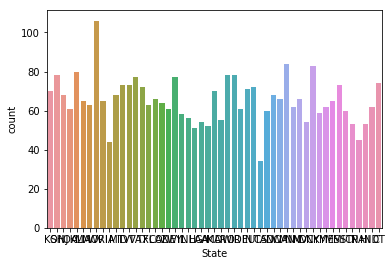

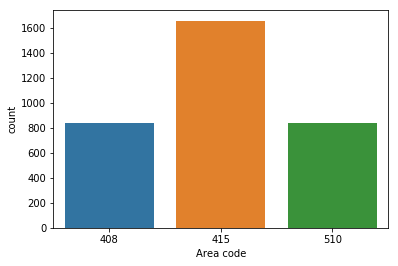

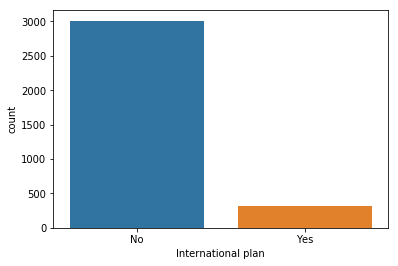

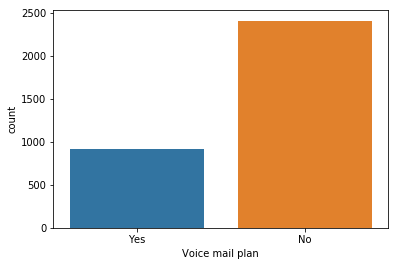

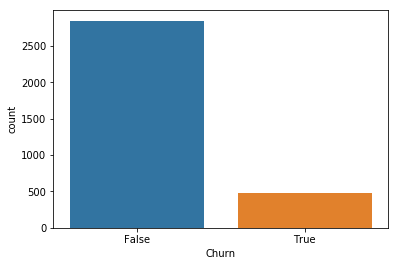

In [43]:
for i in non_cont:
    sns.countplot(teledf[i])
    plt.show()

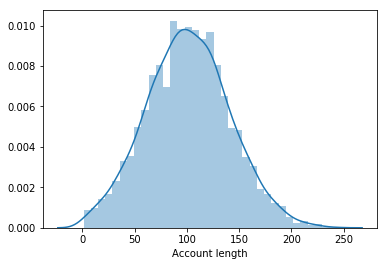

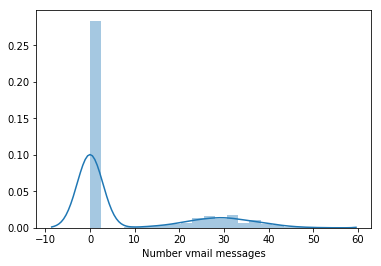

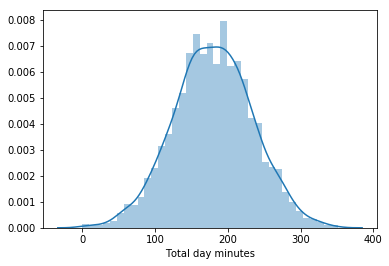

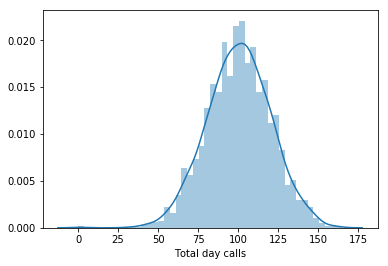

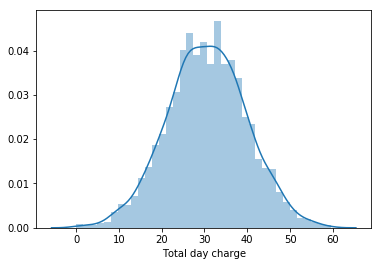

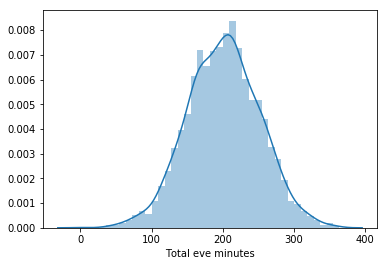

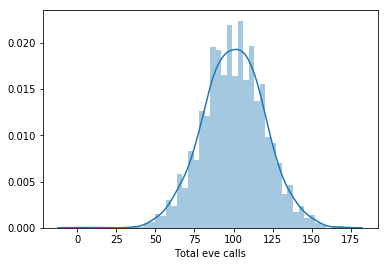

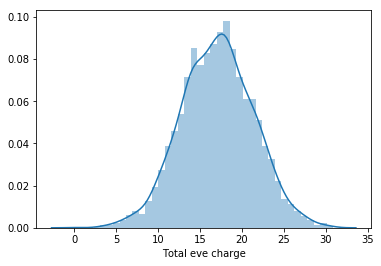

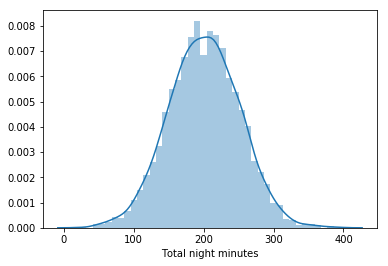

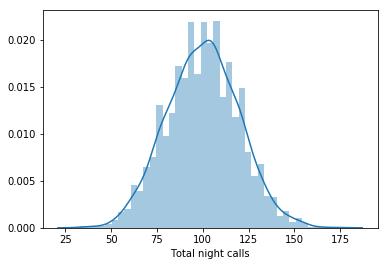

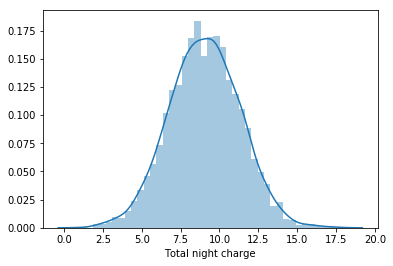

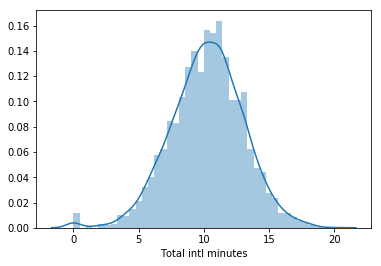

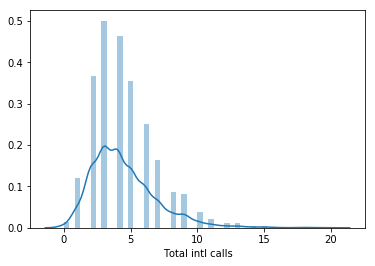

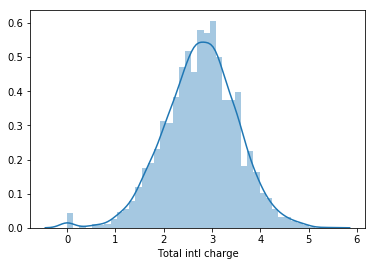

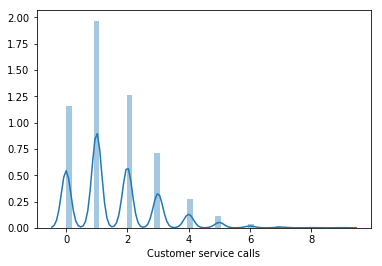

In [44]:
for i in cont_var:
    sns.distplot(teledf[i])
    plt.show()

## Column Transformation

In [11]:
#QC

teledf[cat_var].dtypes, teledf[cont_var].dtypes

(State        object
 Area code     int64
 dtype: object, Account length              int64
 Number vmail messages       int64
 Total day minutes         float64
 Total day calls             int64
 Total day charge          float64
 Total eve minutes         float64
 Total eve calls             int64
 Total eve charge          float64
 Total night minutes       float64
 Total night calls           int64
 Total night charge        float64
 Total intl minutes        float64
 Total intl calls            int64
 Total intl charge         float64
 Customer service calls      int64
 dtype: object)

In [12]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [13]:
data_transformer = ColumnTransformer(transformers = [
    ('cont', 'passthrough', cont_var),
    ('target', 'passthrough', target_var),
    ('binary', OrdinalEncoder(), bin_var),
    ('nominal', OneHotEncoder(sparse = False), cat_var)],
                                      remainder = 'drop')

In [14]:

data_transformer.fit(teledf)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('cont', 'passthrough',
                                 ['Account length', 'Number vmail messages',
                                  'Total day minutes', 'Total day calls',
                                  'Total day charge', 'Total eve minutes',
                                  'Total eve calls', 'Total eve charge',
                                  'Total night minutes', 'Total night calls',
                                  'Total night charge', 'Total intl minutes',
                                  'Tot...ls', 'Total intl charge',
                                  'Customer service calls']),
                                ('target', 'passthrough', ['Churn']),
                                ('binary',
                                 OrdinalEncoder(categories='auto',
                                                dtype=<class 'num

In [15]:
nom_name=data_transformer.named_transformers_['nominal'].categories_

In [16]:

transformed_nomcat = []

for col, name in zip(cat_var, nom_name):
    for i in name:
        transformed_nomcat.append('_'.join([col,str(i)]))

In [17]:

transformed_nomcat

['State_AK',
 'State_AL',
 'State_AR',
 'State_AZ',
 'State_CA',
 'State_CO',
 'State_CT',
 'State_DC',
 'State_DE',
 'State_FL',
 'State_GA',
 'State_HI',
 'State_IA',
 'State_ID',
 'State_IL',
 'State_IN',
 'State_KS',
 'State_KY',
 'State_LA',
 'State_MA',
 'State_MD',
 'State_ME',
 'State_MI',
 'State_MN',
 'State_MO',
 'State_MS',
 'State_MT',
 'State_NC',
 'State_ND',
 'State_NE',
 'State_NH',
 'State_NJ',
 'State_NM',
 'State_NV',
 'State_NY',
 'State_OH',
 'State_OK',
 'State_OR',
 'State_PA',
 'State_RI',
 'State_SC',
 'State_SD',
 'State_TN',
 'State_TX',
 'State_UT',
 'State_VA',
 'State_VT',
 'State_WA',
 'State_WI',
 'State_WV',
 'State_WY',
 'Area code_408',
 'Area code_415',
 'Area code_510']

In [18]:
teledf_trans = data_transformer.transform(teledf)

In [19]:
trans_col = cont_var + target_var + bin_var  + transformed_nomcat

In [20]:
teledf2 = pd.DataFrame(data = teledf_trans, columns=trans_col)

In [21]:
teledf2.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_408,Area code_415,Area code_510
0,128.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,107.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,137.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,84.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,75.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
teledf2.to_csv('data/teledf.csv', index = False)

# Feature Selection

* Variance Threshold
* Correlation
* ANOVA


In [23]:
# variance threshold

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

In [24]:
# categorical variables

cat_vt = VarianceThreshold(threshold=0.1)

cat_var_df = teledf2[transformed_nomcat + bin_var]
cat_var_df.head()


,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_408,Area code_415,Area code_510,International plan,Voice mail plan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [25]:
cat_vt.fit_transform(cat_var_df)
cat_vt.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True])

In [26]:
vt_features = cat_var_df.loc[:,list(cat_vt.get_support())]
vt_features = list(vt_features.columns)
vt_features

['Area code_408', 'Area code_415', 'Area code_510', 'Voice mail plan']

In [27]:
scaler = MinMaxScaler()

tele_cont = teledf2[cont_var]

tele_cont_scaled = scaler.fit_transform(tele_cont)

In [28]:
#vt_cont = VarianceThreshold(threshold = 0.1)

#vt_cont.fit_transform(tele_cont_scaled)

#none meet threshold

In [29]:
# correlation


top_5_corr = teledf2.corr()['Churn'].abs().sort_values(ascending = False)[:5]
list(top_5_corr.index), top_5_corr

(['Churn',
  'International plan',
  'Customer service calls',
  'Total day minutes',
  'Total day charge'],
 Churn                     1.000000
 International plan        0.259852
 Customer service calls    0.208750
 Total day minutes         0.205151
 Total day charge          0.205151
 Name: Churn, dtype: float64)

In [30]:
corr_features = list(top_5_corr.index)

In [31]:
# ANOVA

from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [32]:

X_ANOVA = tele_cont
y_ANOVA = teledf2.Churn

In [33]:

X_ANOVA_train, X_ANOVA_test, y_ANOVA_train, y_ANOVA_test = train_test_split(X_ANOVA, y_ANOVA, 
                                                                            test_size = 0.2, random_state = 42)

In [34]:
anovascaler = StandardScaler()

X_ANOVA_train_scaled = anovascaler.fit_transform(X_ANOVA_train)
X_ANOVA_test_scaled = anovascaler.transform(X_ANOVA_test)

In [35]:
anovaselector = SelectKBest(score_func = f_classif)
anovaselector.fit(X_ANOVA_train_scaled, y_ANOVA_train)

SelectKBest(k=10, score_func=<function f_classif at 0x000001E0C63FAF28>)

In [36]:
tele_anova = tele_cont.loc[:,list(anovaselector.get_support())]

In [37]:
anova_features = list(tele_anova.columns)

In [38]:
anovaselector.pvalues_.round(3)

array([0.464, 0.   , 0.   , 0.127, 0.   , 0.   , 0.722, 0.   , 0.283,
       0.848, 0.283, 0.   , 0.003, 0.   , 0.   ])

In [39]:
anovaselector.get_support()

array([False,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True])

In [40]:
teledf_final = teledf2[vt_features + corr_features + anova_features]
teledf_final.head()

,Area code_408,Area code_415,Area code_510,Voice mail plan,Churn,International plan,Customer service calls,Total day minutes,Total day charge,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,265.1,45.07,25.0,265.1,110.0,45.07,197.4,16.78,10.0,3.0,2.70,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,161.6,27.47,26.0,161.6,123.0,27.47,195.5,16.62,13.7,3.0,3.70,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,243.4,41.38,0.0,243.4,114.0,41.38,121.2,10.30,12.2,5.0,3.29,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,2.0,299.4,50.90,0.0,299.4,71.0,50.90,61.9,5.26,6.6,7.0,1.78,2.0
4,0.0,1.0,0.0,0.0,0.0,1.0,3.0,166.7,28.34,0.0,166.7,113.0,28.34,148.3,12.61,10.1,3.0,2.73,3.0


In [41]:
teledf_final.to_csv('data/teledf_final.csv')